In [58]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [59]:
#Load Dataset
df1=pd.read_csv(r'C:\Users\brije\Downloads\ChannelDataset.csv')
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
 6   Region            440 non-null    int64
 7   Channel           440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region,Channel
0,12669,9656,7561,214,2674,1338,3,2
1,7057,9810,9568,1762,3293,1776,3,2
2,6353,8808,7684,2405,3516,7844,3,2
3,13265,1196,4221,6404,507,1788,3,1
4,22615,5410,7198,3915,1777,5185,3,2


In [60]:
#Tukey Method

# Import required libraries
from collections import Counter

# Outlier detection 
def detect_outliers(df,n,features):
    
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# List of Outliers
Outliers_to_drop = detect_outliers(df1.drop('Channel',axis=1),0,list(df1.drop('Channel',axis=1)))
df1.drop('Channel',axis=1).loc[Outliers_to_drop]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region
29,43088,2100,2609,1200,1107,823,3
39,56159,555,902,10002,212,2916,3
47,44466,54259,55571,7782,24171,6465,3
52,40721,3916,5876,532,2587,1278,3
87,43265,5025,8117,6312,1579,14351,3
...,...,...,...,...,...,...,...
202,25203,11487,9490,5065,284,6854,1
218,18,7504,15205,1285,4797,6372,1
372,3884,3801,1641,876,397,4829,3
409,8708,3634,6100,2349,2123,5137,3


In [61]:
#Create New Dataset without Outliers
dataset = df1.drop(df1.index[Outliers_to_drop]).reset_index(drop = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             332 non-null    int64
 1   Milk              332 non-null    int64
 2   Grocery           332 non-null    int64
 3   Frozen            332 non-null    int64
 4   Detergents_Paper  332 non-null    int64
 5   Delicassen        332 non-null    int64
 6   Region            332 non-null    int64
 7   Channel           332 non-null    int64
dtypes: int64(8)
memory usage: 20.9 KB


In [83]:
dataset.describe()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region,Channel
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,9547.397590,4105.180723,5875.614458,1863.048193,1958.975904,1016.602410,2.539157,1.286145
std,8161.831206,3363.303146,5038.930756,1707.890373,2347.470292,824.356784,0.782148,0.452640
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,1.000000,1.000000
25%,2989.750000,1352.500000,2011.500000,582.000000,231.750000,360.750000,2.000000,1.000000
50%,7483.500000,3087.000000,3835.500000,1270.500000,715.500000,774.000000,3.000000,1.000000
75%,13987.250000,6251.750000,8928.500000,2587.500000,3461.250000,1456.000000,3.000000,2.000000
max,37036.000000,14982.000000,22272.000000,7683.000000,8969.000000,3637.000000,3.000000,2.000000


<AxesSubplot:>

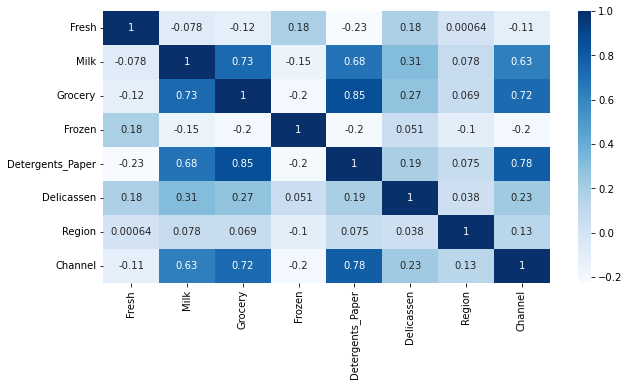

In [63]:
#Visualization of Correlations
fig = plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(),annot=True,cmap="Blues")

In [31]:
#Create Profile Report
 
#Importing package
import pandas_profiling as pp
from IPython.display import IFrame
 
# Profile Report
DiabetesReport = pp.ProfileReport(dataset)
DiabetesReport.to_file('FinalProject.html')
display(IFrame('FinalProject.html', width=900, height=350))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [65]:
#Create x and y variables
x = dataset.drop('Channel', axis=1).to_numpy()
Y = dataset['Channel'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size = 0.2,stratify=Y,random_state = 100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [66]:
#Feature Selection using SelectFromModel
from sklearn.feature_selection import SelectFromModel
clf = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=1000, random_state=100)
clf.fit(x_train2,y_train)
model = SelectFromModel(clf, prefit=True)
feature_idx = model.get_support()
feature_names = dataset.drop('Channel',axis=1).columns[feature_idx]
print('\nKey Features:',feature_names)


Key Features: Index(['Milk', 'Grocery', 'Detergents_Paper'], dtype='object')


In [67]:
#Prepare for Models for Comparison

#Create x and y variables
x2 = dataset[feature_names].to_numpy()
Y2 = dataset['Channel'].to_numpy()

#Create Train and Test Datasets (New Dataset)
from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,Y2,test_size = 0.2,stratify=Y2,random_state = 100)

#Fix the imbalanced Classes
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=100)
x_train_smt,y_train_smt = smt.fit_resample(x_train2,y_train2)


In [68]:
#Class Balance - Test Data
print('Train Data - Class Split')
num_ones = (y_train_smt == 1).sum()
num_twos = (y_train_smt == 2).sum()
print('Class 1 -',  num_ones)
print('Class 2 -',  num_twos)

Train Data - Class Split
Class 1 - 189
Class 2 - 189


In [69]:
#Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline

pipeline =[]

pipe_rdf = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(n_estimators=100,random_state=100))])
pipeline.insert(0,pipe_rdf)

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=1000, random_state=100))])
pipeline.insert(1,pipe_lr)

# Set grid search params 

modelpara =[]

param_gridrdf = {
            'clf__n_estimators': [100,150,200],
            'clf__max_features': [ 'log2', 'sqrt'],
            'clf__bootstrap': [True, False]}
modelpara.insert(0,param_gridrdf)

param_gridlogreg = {'clf__C': [0.01, 0.1, 1, 10, 100], 
                    'clf__penalty': ['l2']}
modelpara.insert(1,param_gridlogreg)

In [70]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params, cv=cv2,scoring='recall_weighted')
    gs_clf = gs_clf.fit(x_train_smt, y_train_smt)
    model = gs_clf.best_estimator_
    
    # Use best model and test data for final evaluation
    y_pred = model.predict(x_test2)

    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
    
    #Output Validation Statistics
    target_names=['Outcome 1','Outcome 2']
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
    print('\nBest Parameters:',bestpara)
    print('\n', confusion_matrix(y_test2,y_pred))  
    print('\n',classification_report(y_test2,y_pred,target_names=target_names))     

In [71]:
#Run Models

for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)


Optimized Model

Model Name: RandomForestClassifier(random_state=100)

Best Parameters: {'clf__bootstrap': True, 'clf__max_features': 'log2', 'clf__n_estimators': 100}

 [[43  5]
 [ 2 17]]

               precision    recall  f1-score   support

   Outcome 1       0.96      0.90      0.92        48
   Outcome 2       0.77      0.89      0.83        19

    accuracy                           0.90        67
   macro avg       0.86      0.90      0.88        67
weighted avg       0.90      0.90      0.90        67


Optimized Model

Model Name: LogisticRegression(class_weight='balanced', max_iter=1000, random_state=100)

Best Parameters: {'clf__C': 100, 'clf__penalty': 'l2'}

 [[43  5]
 [ 2 17]]

               precision    recall  f1-score   support

   Outcome 1       0.96      0.90      0.92        48
   Outcome 2       0.77      0.89      0.83        19

    accuracy                           0.90        67
   macro avg       0.86      0.90      0.88        67
weighted avg       0.90

In [72]:
#Define Plot for learning curve

from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train_smt, 
                                                            y=y_train_smt,
                                                            train_sizes= np.linspace(0.1, 1.0, 10),
                                                            cv=10,
                                                            scoring='accuracy',random_state=100)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.ylim([0.8, 1.01])
    plt.show()

Random Forest - Learning Curve


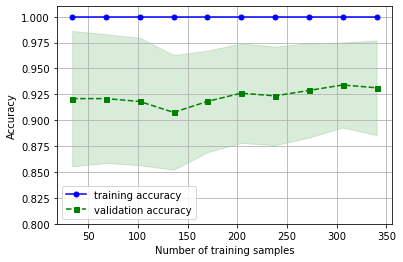


Logistic Regression - Learning Curve


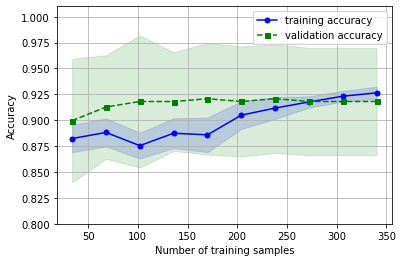

In [73]:
#Plot Learning Curve
print('Random Forest - Learning Curve')
plot_learning_curves(pipe_rdf)
print('\nLogistic Regression - Learning Curve')
plot_learning_curves(pipe_lr)

In [74]:
#Prepare Models 
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score

In [75]:
#Script for Models

from sklearn.metrics import classification_report, confusion_matrix  

models2 ={'Bagging Classifier':BaggingClassifier(random_state=100),
          'AdaBoost':AdaBoostClassifier(random_state=100),
          'GBC':GradientBoostingClassifier(random_state=100)}
    
for name, model in models2.items():
    model.fit(x_train_smt,y_train_smt)
    predict = model.predict(x_test2)
    print('\nEstimator: {}'.format(name)) 
    print('\n',confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict))  


Estimator: Bagging Classifier

 [[43  5]
 [ 6 13]]
              precision    recall  f1-score   support

           1       0.88      0.90      0.89        48
           2       0.72      0.68      0.70        19

    accuracy                           0.84        67
   macro avg       0.80      0.79      0.79        67
weighted avg       0.83      0.84      0.83        67


Estimator: AdaBoost

 [[44  4]
 [ 2 17]]
              precision    recall  f1-score   support

           1       0.96      0.92      0.94        48
           2       0.81      0.89      0.85        19

    accuracy                           0.91        67
   macro avg       0.88      0.91      0.89        67
weighted avg       0.91      0.91      0.91        67


Estimator: GBC

 [[43  5]
 [ 1 18]]
              precision    recall  f1-score   support

           1       0.98      0.90      0.93        48
           2       0.78      0.95      0.86        19

    accuracy                           0.91        

In [76]:
#Create Voting Model - Sklearn
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate

x_2 = sc.transform(x)

estimators = []

model1 = RandomForestClassifier(bootstrap=True, max_features='log2', n_estimators=100,random_state=100)
estimators.append(('Random Forest', model1))

model2=GradientBoostingClassifier(random_state=100)
estimators.append(('GBC', model2))

voting_clf=VotingClassifier(estimators,voting='soft')

scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro'}
print('\nVoting Model')
for clf in (model1,model2,voting_clf):
    rkfcv= clf.fit(x_train_smt,y_train_smt)
    ens_rkf1 = RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    rKFcv = cross_validate(rkfcv, x_2, Y, scoring=scoring, cv=ens_rkf1)
    print(clf.__class__.__name__,round(rKFcv['test_rec_macro'].mean(),2))   


Voting Model
RandomForestClassifier 0.9
GradientBoostingClassifier 0.89
VotingClassifier 0.9
